In [ ]:
import os
file_dir_path = './방송'
file_names = os.listdir(file_dir_path)
file_names

i = 1
for name in file_names:
    before_name = os.path.join(file_dir_path, name)
    after_name = str(i) + '.json'
    after_name = os.path.join(file_dir_path, after_name)
    os.rename(before_name, after_name)
    i += 1

In [ ]:
import json

preprocessed_data = []

fileName = "방송/"

for i in range(1, 18):
    with open(fileName + str(i) + ".json", 'r', encoding='utf-8') as f1:
        json_data = json.load(f1)
        
        text_data = json_data["SJML"]["text"]
        
        
        
        for j in range(len(text_data)):
            data_candidates = text_data[j]["content"]
            
            #다 띄어쓰기 해주기
            data_candidates = " ".join(data_candidates)

            #띄어쓰기 한 부분에 <SP> 넣기
            data_candidates = data_candidates.replace("  ", " <SP>")
            
            #길이가 20이상인것은 20이하로 자르기
            if(len(data_candidates) > 20):
                data_candidates = data_candidates[:20]
            
            #짝수번째 인것은 끝에 <\S> 붙여주고 줄 바꿈
            if (j%2==1):
                preprocessed_data += data_candidates+" </S>\n"
                with open("sampling_data4.txt", "a") as f2:
                    f2.writelines(preprocessed_data)
            #홀수번째 인것은 끝에 탭하기
            else:
                preprocessed_data = data_candidates +"\t" 

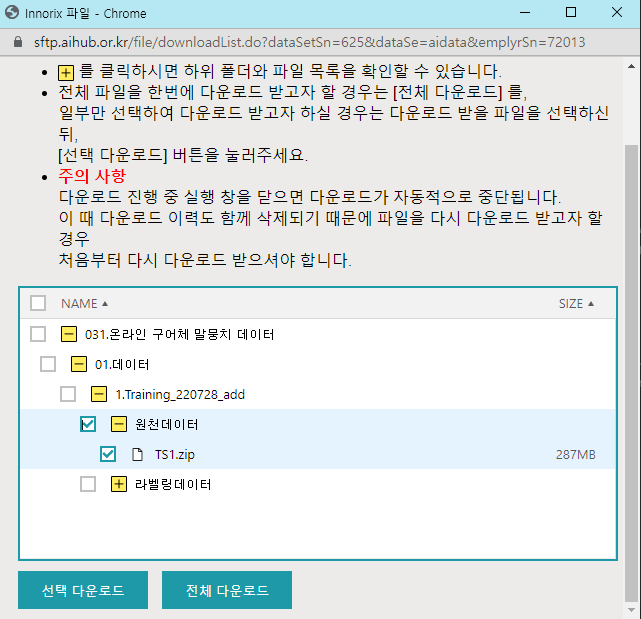
- 다운로드 과정

데이터 다 다운 받은 후

파일명을 숫자로 바꾸고  위에 코드와 같이 데이터 샘플링을 해주었음

